In [2]:
!pip install -q kaggle

In [3]:
!mkdir ./kaggle

mkdir: cannot create directory './kaggle': File exists


In [5]:
!touch kaggle/kaggle.json

In [4]:
api_token = {"username":"ahmadabdelhameed","key":"566da27f149ac50fdc0307f957c4c606"}

In [5]:
import json

with open('kaggle/kaggle.json','w') as file:
    json.dump(api_token , file)

In [12]:
!chmod 600 /home/studio-lab-user/.kaggle/kaggle.json

In [14]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia --force

100%|█████████████████████████████████████▉| 2.29G/2.29G [00:27<00:00, 87.6MB/s]
100%|██████████████████████████████████████| 2.29G/2.29G [00:27<00:00, 89.3MB/s]


In [18]:
import zipfile
with zipfile.ZipFile('./chest-xray-pneumonia.zip','r') as zip_ref:
    zip_ref.extractall('./data')

In [6]:
import glob as gb
import random
import matplotlib.pyplot as plt

In [7]:


def get_random_image(dir,condition):
    placeholder = ''
    if(condition == 'n'):
        placeholder = 'NORMAL'
    elif (condition == 'p'):
        placeholder = 'PNEUMONIA'
    else:
        raise Exception("Sorry Invalid Condition")
        
    folder = f"./data/chest_xray/{dir}/{placeholder}/*.jpeg"
    img_paths = gb.glob(folder)
    max_length = len(img_paths)
    randomNumber = random.randint(0,max_length)
    
    for index,item in enumerate(img_paths,start=1):
        if index==randomNumber:
            print(index,item)
            image= plt.imread(item)
            readyImage = plt.imshow(image)
            return readyImage

495 ./data/chest_xray/train/NORMAL/IM-0651-0001.jpeg


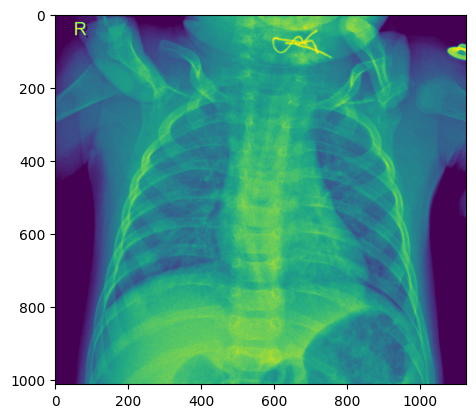

In [26]:
get_random_image("train","n")

1817 ./data/chest_xray/train/PNEUMONIA/person27_bacteria_138.jpeg


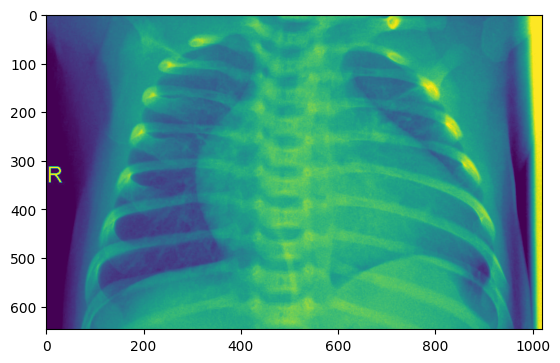

In [9]:
get_random_image("train","p")

In [11]:
!pip install -U Pillow

     |████████████████████████████████| 4.5 MB 4.5 MB/s eta 0:00:01
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.5.0
    Uninstalling Pillow-9.5.0:
      Successfully uninstalled Pillow-9.5.0


In [15]:
from PIL import Image

image = Image.open("data/chest_xray/train/PNEUMONIA/person1004_bacteria_2935.jpeg")

In [16]:
print(image.format)
print(image.size)
print(image.mode)

JPEG
(1184, 816)
L


In [18]:
image = Image.open("Screenshot from 2024-03-16 05-48-26.png")
rgb_image = image.convert("RGB")
print(rgb_image.mode)

RGB


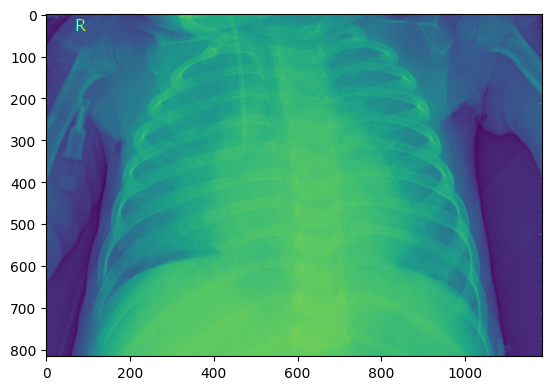

In [20]:
import matplotlib.image as mpimg

image = mpimg.imread("data/chest_xray/train/PNEUMONIA/person1004_bacteria_2935.jpeg")
imgplot = plt.imshow(image)
plt.show()

In [48]:
## Training Data

In [28]:
import glob as gb

normal_folder = "data/chest_xray/train/NORMAL/"
pneumonia_folder = "data/chest_xray/train/PNEUMONIA/"

normal_images = gb.glob(normal_folder+ "*.jpeg") + gb.glob(normal_folder + "*.jpg") + gb.glob(normal_folder + "*.png")
pneumonia_images = gb.glob(pneumonia_folder+ "*.jpeg") + gb.glob(normal_folder + "*.jpg") + gb.glob(normal_folder + "*.png")

normal_counts = len(normal_images)
pneumonia_counts = len(pneumonia_images)

# Print the counts
print("Number of normal images:", normal_counts)
print("Number of pneumonia images:", pneumonia_counts)

Number of normal images: 1341
Number of pneumonia images: 3875


In [38]:
import os
# Function to resize and save images
def resize_and_save(images, output_subfolder, count):
    output_path = os.path.join("data/chest_xray/train/", output_subfolder + "_" + str(count))
    os.makedirs(output_path, exist_ok=True)
    for idx, img_path in enumerate(images):
        full_size_image = Image.open(img_path)
        resized_image = full_size_image.resize((224, 224))
        save_path = os.path.join(output_path, f"{output_subfolder}_{idx}.jpg")
        plt.imsave(save_path, resized_image, cmap="gray", format="jpeg")

In [39]:
resize_and_save(normal_images, "train_normal", normal_counts)

In [40]:
resize_and_save(pneumonia_images, "train_pneumonia", pneumonia_counts)

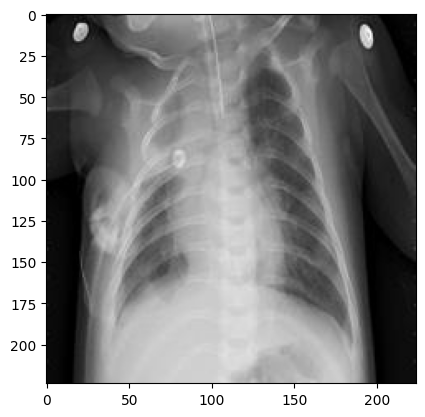

In [42]:
import matplotlib.image as mpimg

image = mpimg.imread("data/chest_xray/train/train_pneumonia_3875/train_pneumonia_1024.jpg")
imgplot = plt.imshow(image)
plt.show()

In [ ]:
## Testing Data

In [43]:
import os

import glob as gb

normal_folder = "data/chest_xray/test/NORMAL/"
pneumonia_folder = "data/chest_xray/test/PNEUMONIA/"

normal_images = gb.glob(normal_folder+ "*.jpeg") + gb.glob(normal_folder + "*.jpg") + gb.glob(normal_folder + "*.png")
pneumonia_images = gb.glob(pneumonia_folder+ "*.jpeg") + gb.glob(normal_folder + "*.jpg") + gb.glob(normal_folder + "*.png")

normal_counts = len(normal_images)
pneumonia_counts = len(pneumonia_images)


# Function to resize and save images
def resize_and_save(images, output_subfolder, count):
    output_path = os.path.join("data/chest_xray/test/", output_subfolder + "_" + str(count))
    os.makedirs(output_path, exist_ok=True)
    for idx, img_path in enumerate(images):
        full_size_image = Image.open(img_path)
        resized_image = full_size_image.resize((224, 224))
        save_path = os.path.join(output_path, f"{output_subfolder}_{idx}.jpg")
        plt.imsave(save_path, resized_image, cmap="gray", format="jpeg")
        
resize_and_save(normal_images, "test_normal", normal_counts)
resize_and_save(pneumonia_images, "test_pneumonia", pneumonia_counts)

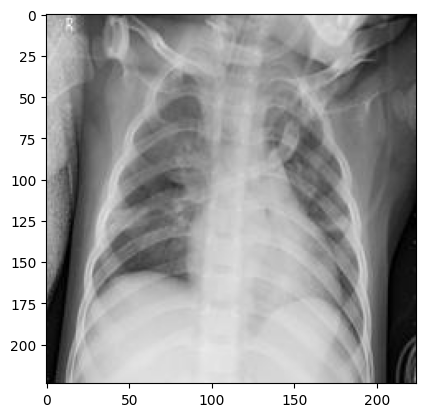

In [45]:
import matplotlib.image as mpimg

image = mpimg.imread("data/chest_xray/test/test_pneumonia_390/test_pneumonia_102.jpg")
imgplot = plt.imshow(image)
plt.show()

In [ ]:
## Validation Data

In [46]:
import os

import glob as gb

normal_folder = "data/chest_xray/val/NORMAL/"
pneumonia_folder = "data/chest_xray/val/PNEUMONIA/"

normal_images = gb.glob(normal_folder+ "*.jpeg") + gb.glob(normal_folder + "*.jpg") + gb.glob(normal_folder + "*.png")
pneumonia_images = gb.glob(pneumonia_folder+ "*.jpeg") + gb.glob(normal_folder + "*.jpg") + gb.glob(normal_folder + "*.png")

normal_counts = len(normal_images)
pneumonia_counts = len(pneumonia_images)


# Function to resize and save images
def resize_and_save(images, output_subfolder, count):
    output_path = os.path.join("data/chest_xray/val/", output_subfolder + "_" + str(count))
    os.makedirs(output_path, exist_ok=True)
    for idx, img_path in enumerate(images):
        full_size_image = Image.open(img_path)
        resized_image = full_size_image.resize((224, 224))
        save_path = os.path.join(output_path, f"{output_subfolder}_{idx}.jpg")
        plt.imsave(save_path, resized_image, cmap="gray", format="jpeg")
        
resize_and_save(normal_images, "val_normal", normal_counts)
resize_and_save(pneumonia_images, "val_pneumonia", pneumonia_counts)

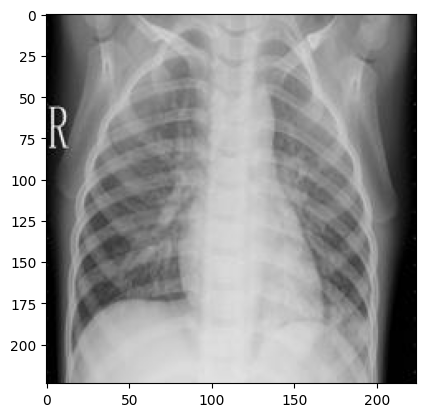

In [47]:
import matplotlib.image as mpimg

image = mpimg.imread("data/chest_xray/val/val_pneumonia_8/val_pneumonia_4.jpg")
imgplot = plt.imshow(image)
plt.show()

In [ ]:
# Move val images to "validation" folder

In [49]:
!mkdir "data/chest_xray/val/validation/"

In [51]:
!mv data/chest_xray/val/val_normal_8/*.jpg data/chest_xray/val/validation/

In [52]:
!mv data/chest_xray/val/val_pneumonia_8/*.jpg data/chest_xray/val/validation/

In [53]:
!rm -r data/chest_xray/val/val_pneumonia_8
!rm -r data/chest_xray/val/val_normal_8

In [54]:
# Move test images to "training" folder

In [55]:
!mkdir "data/chest_xray/train/training/"

In [56]:
!mv data/chest_xray/train/train_normal_1341/*.jpg data/chest_xray/train/training/
!mv data/chest_xray/train/train_pneumonia_3875/*.jpg data/chest_xray/train/training/

In [57]:
!rm -r data/chest_xray/train/train_normal_1341
!rm -r data/chest_xray/train/train_pneumonia_3875

In [58]:
# Move test images to "testing" folder

In [59]:
!mkdir "data/chest_xray/test/testing/"

In [60]:
!mv data/chest_xray/test/test_normal_234/*.jpg data/chest_xray/test/testing/
!mv data/chest_xray/test/test_pneumonia_390/*.jpg data/chest_xray/test/testing/

In [62]:
!rm -r data/chest_xray/test/test_normal_234
!rm -r data/chest_xray/test/test_pneumonia_390

In [ ]:
## Final Count of images for train , test and val 

In [64]:
import glob as gb

# Path to the folders containing the images

training = "data/chest_xray/train/training/"
testing = "data/chest_xray/test/testing/"
validation = "data/chest_xray/val/validation/"

# Count the number of images in each folder using glob
training_images = gb.glob(training + "*.jpg") 
testing_images = gb.glob(testing + "*.jpg") 
validation_images = gb.glob(validation + "*.jpg") 

# Display the counts
print("Number of training images:", len(training_images))
print("Number of testing images:", len(testing_images))
print("Number of validation images:", len(validation_images))

Number of training images: 5216
Number of testing images: 624
Number of validation images: 16


In [65]:
from PIL import Image

image = Image.open("data/chest_xray/train/training/train_normal_1004.jpg")
print(image.format)
print(image.size)
print(image.mode)

JPEG
(224, 224)
RGB


In [66]:
## Data Visualization

In [68]:
import glob as gb
import pandas as pd

folder = "./data/chest_xray/*/*/*.jpg"

category = []
condition_of_lung = []
filenames = []

all_files = gb.glob(folder)

In [70]:
for filename in all_files:
    if "train" in filename:
        if "pneumonia" in filename:
            category.append("train")
            filenames.append(filename)
            condition_of_lung.append("pneumonia")
        else :
            category.append("train")
            filenames.append(filename)
            condition_of_lung.append("normal")
    elif "test" in filename:
        if "pneumonia" in filename:
            category.append("test")
            filenames.append(filename)
            condition_of_lung.append("pneumonia")
        else :
            category.append("test")
            filenames.append(filename)
            condition_of_lung.append("normal")
    elif "val" in filename:
        if "pneumonia" in filename:
            category.append("val")
            filenames.append(filename)
            condition_of_lung.append("pneumonia")
        else :
            category.append("val")
            filenames.append(filename)
            condition_of_lung.append("normal")
            
all_data_df = pd.DataFrame({"dataset type" : category,"x-ray result": condition_of_lung,"filename":filenames})

In [71]:
all_data_df

,dataset type,x-ray result,filename
0,test,normal,./data/chest_xray/test/testing/test_normal_0.jpg
1,test,normal,./data/chest_xray/test/testing/test_normal_1.jpg
2,test,normal,./data/chest_xray/test/testing/test_normal_10.jpg
3,test,normal,./data/chest_xray/test/testing/test_normal_100...
4,test,normal,./data/chest_xray/test/testing/test_normal_101...
...,...,...,...
5851,val,pneumonia,./data/chest_xray/val/validation/val_pneumonia...
5852,val,pneumonia,./data/chest_xray/val/validation/val_pneumonia...
5853,val,pneumonia,./data/chest_xray/val/validation/val_pneumonia...
5854,val,pneumonia,./data/chest_xray/val/validation/val_pneumonia...


In [74]:
print(category[4286])
print(condition_of_lung[4286])
print(filenames[4286])

train
pneumonia
./data/chest_xray/train/training/train_pneumonia_3087.jpg


In [75]:
import seaborn as sns

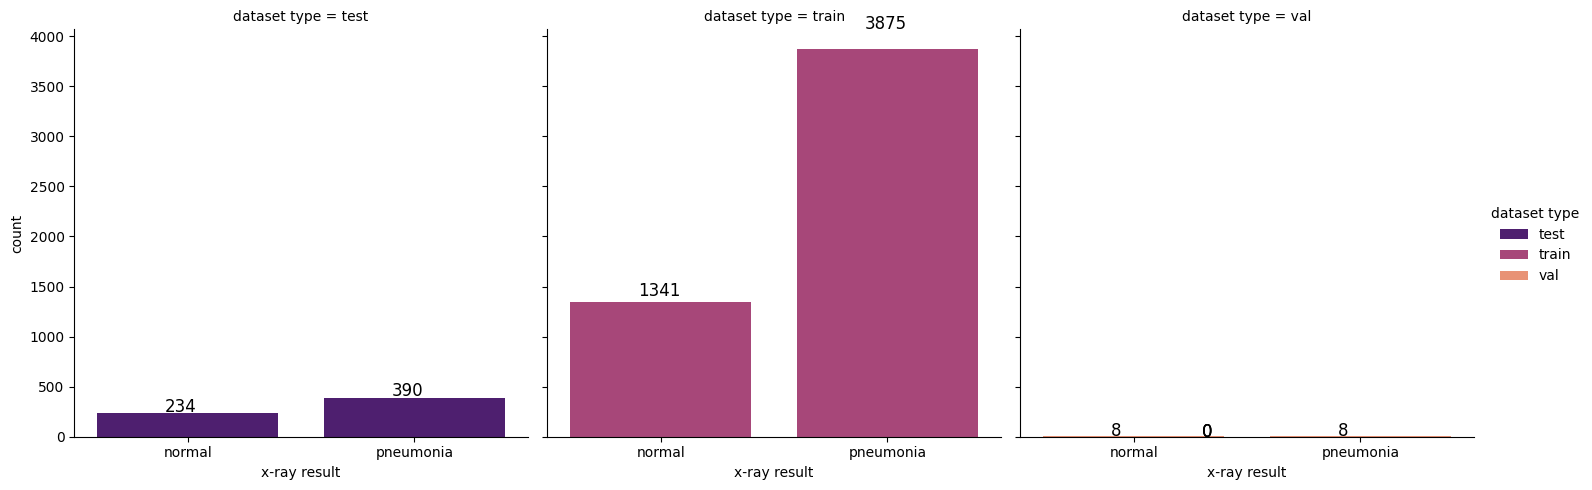

In [90]:
g = sns.catplot(x = "x-ray result" , col = 'dataset type', kind="count",
                palette="magma" ,hue='dataset type', data = all_data_df,legend=True)
for i in range(0,3):
    ax = g.facet_axis(0,i)
    for p in ax.patches:
        ax.text(p.get_x()+0.3,
        p.get_height()*1.05,
        '{0:.0f}'.format(p.get_height()),
        color='black',
        rotation='horizontal',
        size='large')